In [1]:
import pandas as pd
import numpy as np
import sys
import os
import data
from data import loaders
import lightkurve as lk

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
data_dir = "/mnt/disks/lcs/"
data.mount_drive(data_dir)
data_dir = "/mnt/disks/lcs/tess-goddard-lcs/"
sec = 6
ref = pd.read_csv(data_dir+"sector6lookup.csv")

mount: /mnt/disks/lcs: /dev/sdc already mounted on /mnt/disks/lcs.


Disk mounted


In [15]:
#tic_ids of all stars with confidence rate of less than 53% (1-0.47)
#tmcl = ["2_min_cadence" in fn for fn in ref.Filename]
tic = [ 12165310, 443414640,  97566657, 306362985,  36549459, 202057643,
       282270730,  51834509,  93128995, 282393297, 167178953, 200341207,
       220420532, 250462213, 155450553, 436098466,  36549461, 438325776,
       372475743, 229336937, 270714932, 231236716, 220224459, 127233332,
        32539043, 124500156, 124776014, 269279959, 287355511, 157573720,
        37396447,  36440147, 251165368, 250573491,  47632623,  59617313,
       234879731, 438500539, 717425538, 102452605,  48951945, 300707137,
       220077375,  43152097, 167339240, 339672935, 336882813, 229205551,
       299586513, 200546736, 232178820, 232518595, 232191981, 250470331,
        36288097,  39352882,  52420727, 127106464, 202007782, 237491373,
       317599919, 120664175, 287429535,  52417598, 238090350, 255685600,
       282607438, 280222813, 715405694, 427497933,  32595887, 220144004,
       714452405, 153708335, 257065278, 282583964, 232280036,  20209072,
       237816348, 237400810,  36210679, 241914912,  43146570, 283005109,
       282303787,  49612847, 382188519, 232458895, 387229926, 281901486,
       238180568, 438498642, 234938150, 293347945, 715405690, 220195317,
       158822320, 231817263, 281801438, 282613891,  37163538,  71970184,
       172305135, 156949245, 124016594,  71726560, 151065131, 231152314,
       301285053, 281408526, 234735428, 438364944, 333146587, 308391497,
       387684946, 322823996, 386322987,  34933010,  59715245, 291384173,
       426214313, 120664165, 303849788, 762777022, 438306260, 151510373,
       438147777,  35582455, 288072024, 255586594, 235339045, 251190870,
       179444594,  47587357, 172404799, 270799701, 264462228, 235185213,
       143281459, 140600723, 229394040, 715314356, 714452401, 436153552,
       157405487, 234014589, 234730997, 282263344, 265708829, 232506748,
       319366512,  97961991, 124500150, 237465543,  96745066,  12165297,
       711256498, 220109817, 235154058,  36440139,  53648000,  52554983,
        42994136, 282303485, 250573495, 280634377,  47392010, 438532561,
       260370457, 199898799, 199886264, 762759578, 307373514, 445937964,
        77995494, 158759648, 264487296, 200049678,  49313443, 443117776,
       231205016, 510539279,  93128996, 464837894,  42435133, 251113047,
       711129046, 279792445, 235050640, 123890384,  35951419, 280302041,
        42890872,  71685404, 206946497, 277023273, 277298108, 404932359,
       237742502, 713395921, 124546753, 140381941, 247591778, 269205935,
        80768244, 167172821, 302423551,  96800487, 140861399, 235229741,
       307810919, 281914258, 220420530, 322738148,  42168297,  37083693,
         4292476,  37240188, 386043686, 247720147, 151470835,  59280651,
        97566671, 247918430,  97566692,  31671992, 250462209, 332831632,
       235449770, 237441954, 234159688, 301591488, 434398001, 438365749,
       389316873,  89005366,  34264284, 387684951,  59715258, 206732580,
       156730506, 443414621, 262608099, 382517607, 279053102, 120664166,
       716782343, 717537439, 308495472, 142403612, 434320278, 147123427,
       288149225,  33943112,  46273425, 685621394, 143336681, 290749711,
       263808686, 235272616, 142524060, 251190875,  36549480, 167972680,
       299562565, 235078725, 300037422,  30469722, 235282308, 153165368,
        63351161,  32595895,  32595900, 119458098, 140600708, 140600725,
       510664382, 220127076, 438532558, 263694968, 220224470, 291341162,
       313139661, 200546729, 715725408, 715725409,  21541949,  91921979,
       127233318, 127233356, 235334145, 370138604, 314829491, 237465542,
       237647559, 234014585, 237530835, 282583969, 234173734, 234048280,
       282671013, 349966930, 120880608, 206708910,  52756578,  14172739,
       238198819, 238200029, 269279965,  36443906, 237694456, 282351875,
       265257062, 237465548, 235444806,  32529673,  53324331,  42466659,
        43328827,  37396446, 251189679, 251189884, 120544014, 281804977,
       282801290, 282305496, 282607443, 280212248, 251213788,  80839869,
       251264035, 280633333,  36995471,  36575401,  36574505, 251181259,
       283005106, 282303482, 283090696, 250493929, 737538305, 260131653,
        72781576,   4254652, 157751383, 427398898, 281976034, 287869391,
       287869326, 120275018,  59716645, 437962136, 437938465, 717537444,
       437894339,  59618593, 308482596, 124190846, 124190858, 124774826,
       200118122, 120265259, 233975532, 120264989, 372662739, 438500536,
       438536891, 151235885, 386426469, 438538751,  60584165, 255637585,
       206765546, 144730283, 139474512, 263475932, 156425659, 282393307,
        53328207,  43152098,  42887164,  52818576,  11408658, 242066344,
       251155705,  72882365, 734762265,  35951421, 281801435, 427452055,
       427452053,  42826862,  66529052, 443085299,  46638308, 220212731,
       235175995, 235106611, 235106619, 220282364, 179371762, 365567213,
       365776461,  60172761, 172362571,  52866404,  60038895,  88921680,
       293991594, 438225303, 247603389, 151509615, 247681396, 139644150,
       269205934, 274318339, 247923857,  47347765, 358109840, 431481674,
       431589490, 280098560, 372654594, 281408528, 232501855, 232256217,
       354570582, 147979811,  50587560, 168194752, 237722411, 237697651,
       255752317, 386043689, 437887247,  91864797, 265453680,  52818594,
        97566668, 120664170, 220238893, 220315618, 231205005, 259699534,
       220420534]

In [9]:
ref

,Filename,RA,Dec,TIC_ID,Sector,Camera,CCD,Magnitude
0,tesslcs_sector_6_104/2_min_cadence_targets/tes...,95.791999,-1.608044,251269189,6,1,2,7.80838
1,tesslcs_sector_6_104/2_min_cadence_targets/tes...,84.545860,-0.936653,11199201,6,1,1,10.15940
2,tesslcs_sector_6_104/2_min_cadence_targets/tes...,84.402924,-0.887149,11197342,6,1,1,9.15940
3,tesslcs_sector_6_104/2_min_cadence_targets/tes...,102.088569,2.826208,234271852,6,1,2,13.56620
4,tesslcs_sector_6_104/2_min_cadence_targets/tes...,104.070502,3.549578,237736917,6,1,2,13.88590
...,...,...,...,...,...,...,...,...
2779720,tesslcs_sector_6_104/tesslcs_tmag_9_10/tesslc_...,98.061709,13.446674,306910194,6,1,3,9.98860
2779721,tesslcs_sector_6_104/tesslcs_tmag_9_10/tesslc_...,97.973194,12.182753,306808426,6,1,3,9.96820
2779722,tesslcs_sector_6_104/tesslcs_tmag_9_10/tesslc_...,98.085972,12.615259,306911868,6,1,3,9.03830
2779723,tesslcs_sector_6_104/tesslcs_tmag_9_10/tesslc_...,98.040185,12.074514,306912997,6,1,3,9.47940


In [4]:
#all random forest predicted eb sample of 100
tic = [260161144, 156241056, 309908721,  63192395, 144695651, 153166843,
       234211934, 141268467,  42991745, 300654002, 201497357, 231822771,
        33419790, 119461266,  42828781, 350443417, 350622185, 264594193,
        35481236, 281055015,  92009366,  36369488, 241992883, 281409893,
       306691906, 234876565, 437986153, 737425239,  59715570,  59715572,
        34508912, 438228173, 143350469,  33743771, 206840192, 291380703,
       167746516,  53588177, 235409189, 220200239, 153166064, 443052779,
        25126289, 220140809,  80603783, 220149256,  46623628, 247952100,
       124688144, 237647548, 257064676, 257064693, 257064029, 237465888,
       301185877, 307812314, 340979875,  24433067, 220205515, 220278771,
        43250275, 281897356, 250589512,  50744490,  36574983, 281494100,
        79781905, 158824564, 231921891, 124099758, 437938517, 438226468,
       134309817, 264483228, 233975504, 438124870, 151470826, 206763638,
       237753600, 234699871, 280431207, 231803612, 120023539,  46485176,
       382101519, 264594194, 229385082,  31796120, 369681536, 301704153,
       436429333,  80768279, 247923859, 232032228, 235548197, 247951922,
        52515811, 265156769, 232034359, 220042007]

In [5]:
#tic_id of a sample of 100 stars with confidence rate of between 20%-40%
tic = [ 78568736, 291385340, 350478924, 231809798,  31118189, 263284321,
       160328766, 141975903,  49547177,  13345143,  12165310, 278826996,
       382067804, 260162199, 138857475, 322899250,  42889751, 276935987,
       229282662, 167303776, 279955276, 404854539, 141685465, 427398881,
        30313682, 370101492,  52910768, 237558971, 237702040, 199889776,
       438228316, 247560986, 142718336,  78056414,  78056415,  91866171,
       124777433, 151233402, 229163063, 206791096,  79140936,  63357400,
       380026900, 322816126, 156998635,  63039598, 255586667, 259574789,
       259589049, 291332565,  80839678,  37404443,  37248141, 172465372,
       206703819, 263272455, 233970058, 364537633,  32595021, 202057921,
        53324352,  53421164,  52906667,  97643621, 382044071,  78746287,
       269117184, 199886262,   7418959, 372655446, 237499890,  92010432,
       274235905, 229274555, 158819162, 234818672, 265908204, 199895357,
       220066690, 281716393, 235055647, 260298902, 282209987,  34851017,
       234768792, 140381885, 144665654,  51930140, 206657848, 431481681,
       280051904, 232418560,   4203828, 147032689, 287842867,  72833485,
         4250817, 263338610, 120327872, 453097744]

In [6]:
#lookuptable rows of tics
ref_subset = ref[ref['TIC_ID'].isin(tic)]

In [7]:
s6_sub_files = data_dir+ref_subset.Filename.values
lcc = loaders.LightCurveCollection(ref_subset.Sector.values,
                                   ref_subset.Camera.values,
                                   s6_sub_files,
                            )
lcc.useCpus = 4
lcc.load_all_lcs()


/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages(f"Sector{sec}/20-40%ebSector{sec}.pdf") as pdf:
    plt.cla()
    for i in range(100):
        lcc.lcs[i].scatter()
        pdf.savefig()
        plt.close();
plt.close()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

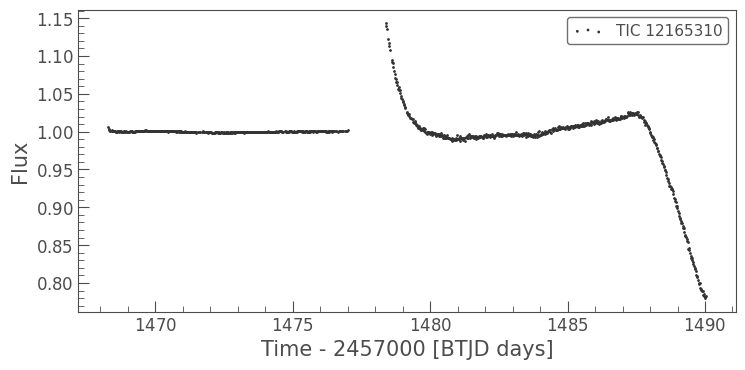

In [25]:
lcc.lcs[0].scatter()